# Create house price prediction model

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# Fumctiom to find unique values
def uniqueValues(column, cleaned_dataset):
    if column in cleaned_dataset.columns:
        missing_count = cleaned_dataset[column].unique()
        print(f"Number of unique values in '{column}': {missing_count}")
    else:
        print(f"Column '{column}' not found in the dataset.")


df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [107]:
uniqueValues('Neighborhood', df)
uniqueValues('Condition1', df)
uniqueValues('Condition2', df)
uniqueValues('MiscFeature', df)
uniqueValues('MSSubClass', df)
uniqueValues('PoolArea', df)
uniqueValues('RoofStyle', df)
uniqueValues('RoofMatl', df)
uniqueValues('ExterQual', df)
uniqueValues('ExterCond', df)
uniqueValues('OverallQual', df)
uniqueValues('OverallCond', df)
uniqueValues('HouseStyle', df)
uniqueValues('Condition1', df)
uniqueValues('Condition2', df)
uniqueValues('BldgType',df)
uniqueValues('LotConfig', df)
uniqueValues('Utilities', df)
uniqueValues('LotShape',df)
uniqueValues('MSZoning', df)
uniqueValues('Street', df)
uniqueValues('Alley', df)

# PoolQC	Fence	MiscFeature

uniqueValues('PoolQC', df)
uniqueValues('Fence', df)
uniqueValues('MiscFeature', df)
uniqueValues('SaleCondition', df)

uniqueValues('Electrical', df)
uniqueValues('CentralAir', df)
counts = df['CentralAir'].value_counts()

print(counts)

Number of unique values in 'Neighborhood': ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Number of unique values in 'Condition1': ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Number of unique values in 'Condition2': ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Number of unique values in 'MiscFeature': [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Number of unique values in 'MSSubClass': [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Number of unique values in 'PoolArea': [  0 512 648 576 555 480 519 738]
Number of unique values in 'RoofStyle': ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
Number of unique values in 'RoofMatl': ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Number of unique values in 'ExterQual': [

## Visualaize data to get initial insights

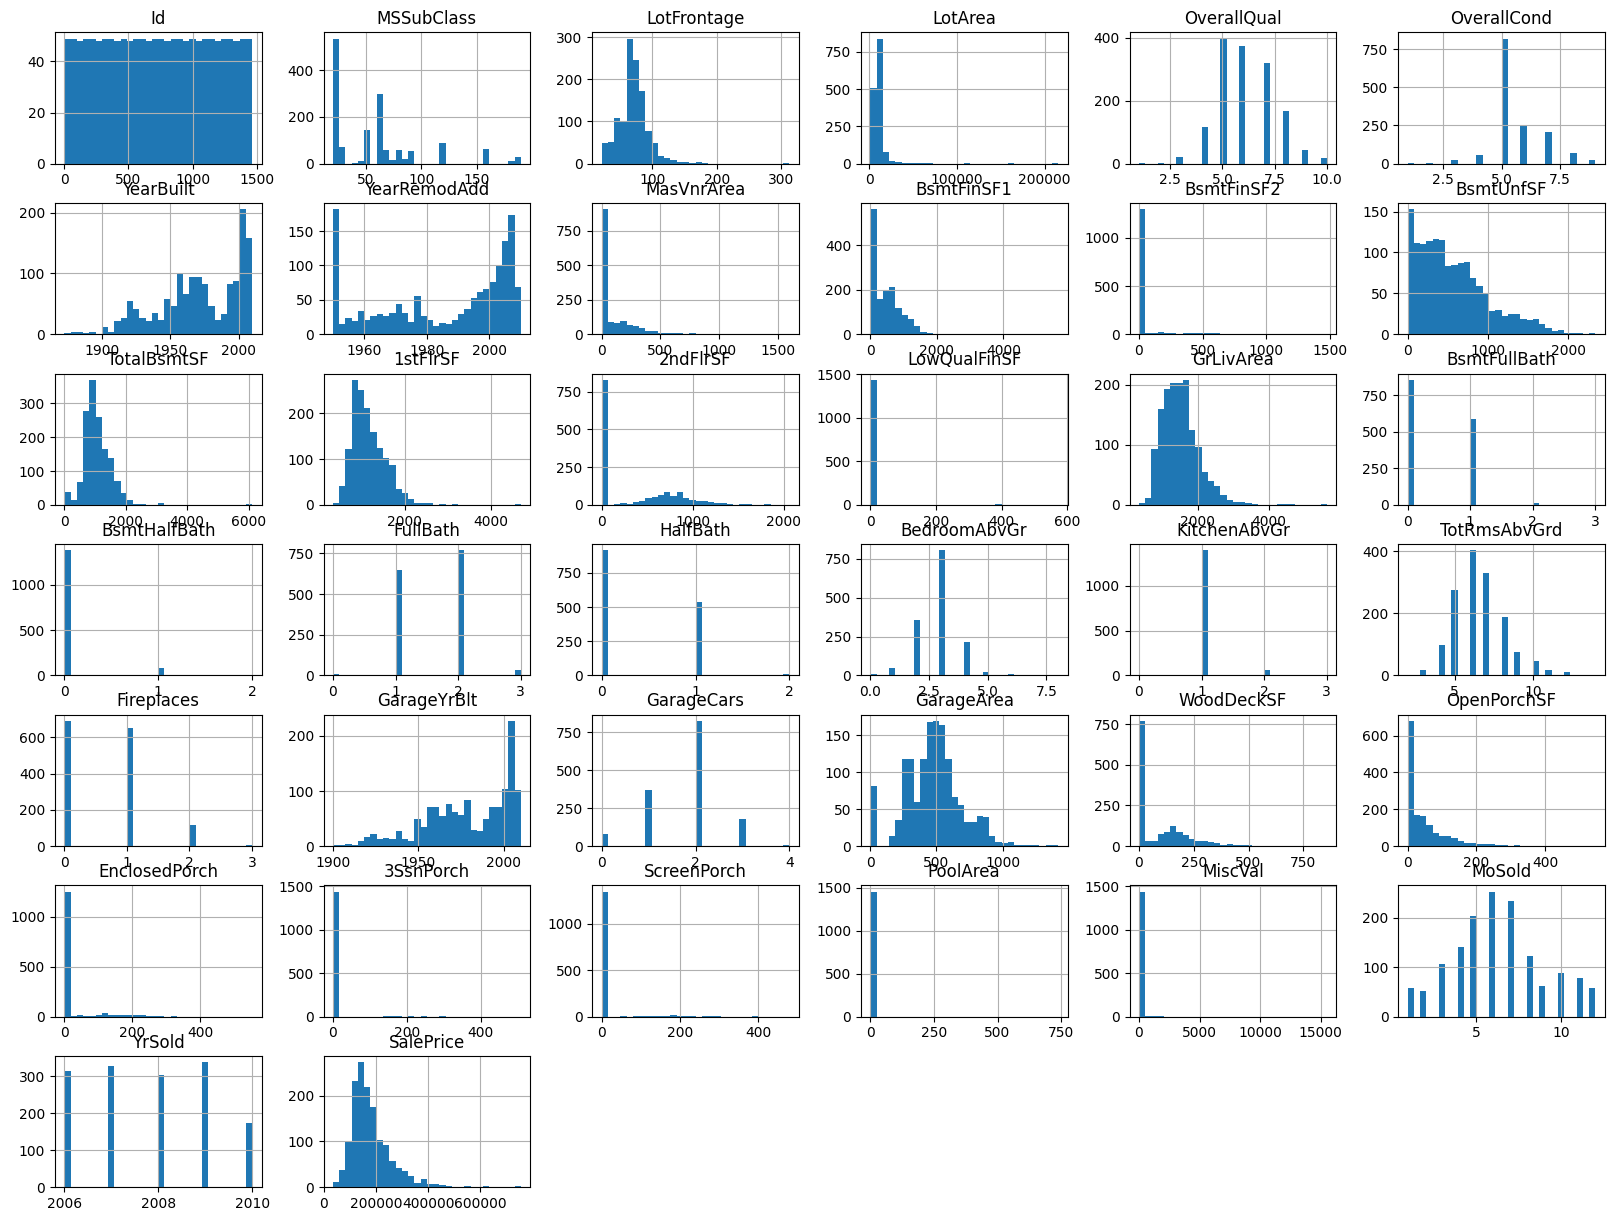

In [108]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(20, 15))
plt.show()

In [109]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Plot some features VS Sale Price. Check and experement the correlation between attributes 

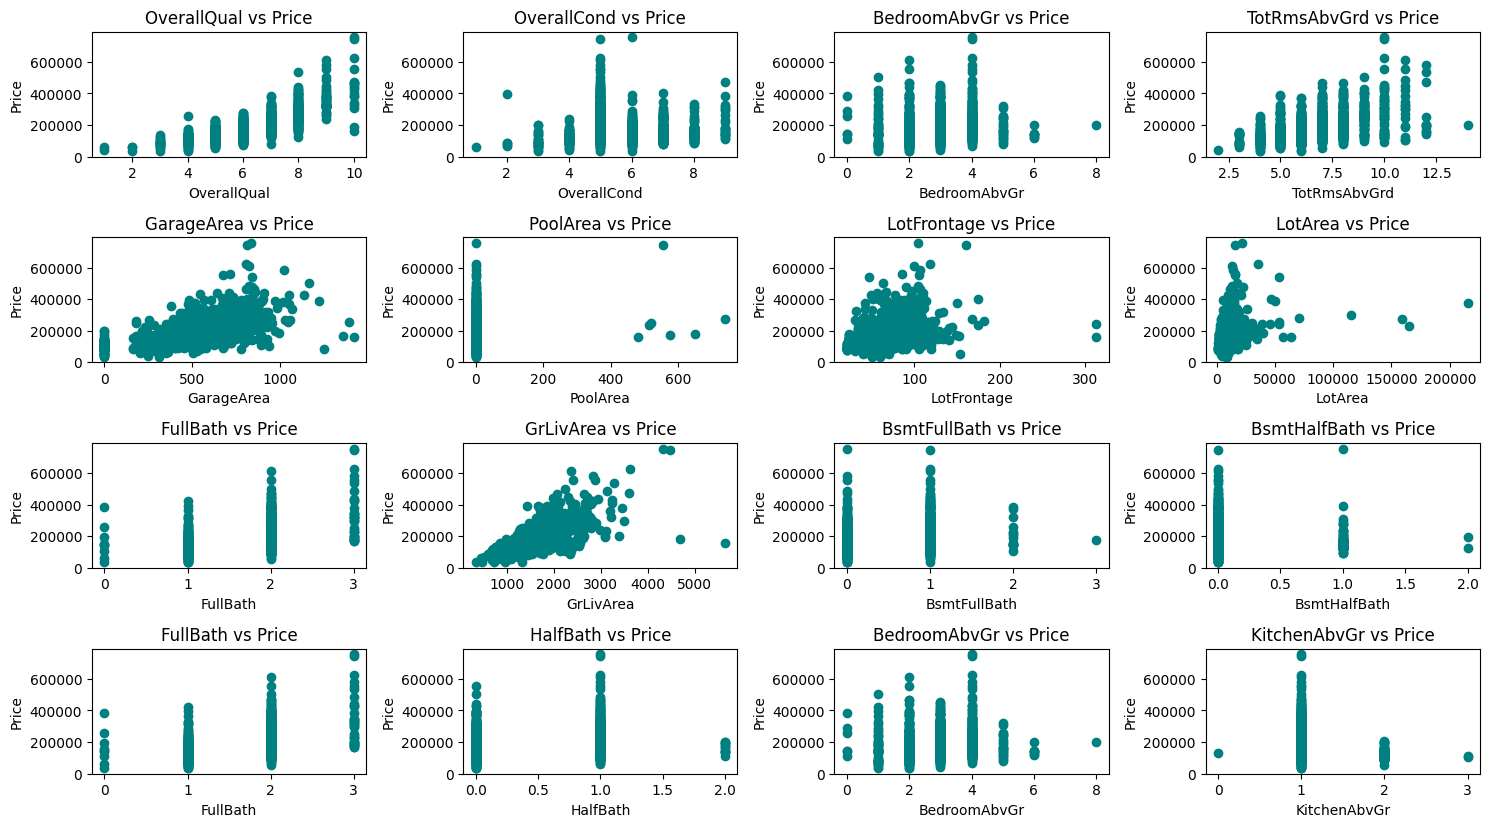

In [110]:
#sns.countplot(x='MSSubClass', data = df, palette='Set1')


# Plot slelected feature against price

features = ['OverallQual', 'OverallCond', 'BedroomAbvGr', 'TotRmsAbvGrd','GarageArea', 'PoolArea', 'LotFrontage', 'LotArea', 'FullBath',
           'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr']

n_rows = 5
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
,
# Flatten the 2D axes array for easier iteration
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df['SalePrice'], color='teal')
    axes[i].set_title(f'{ feature} vs Price')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

# Hide any unused subplots (if any)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### As per above visual we can frame the problem.

### It's clearly suppervised learnig task, since we are given labled training examples (each instance has expected output which is sale price). It is also typical regression task, since we have to predict value.

### For Performance measure we will selecty RMSE

## NEXT is feature selection and feature engineering. 
### From the dataset we will be selecting related features and create age feature using YearBuilt columns. Also, We convert catigorical data to numeric based on ranked/ non ranked category. We will drop remaining features. After we can start train the model


In [111]:
from datetime import datetime

current_year = datetime.now().year

df['age'] = current_year - df['YearBuilt']

In [112]:
df['age']

0        22
1        49
2        24
3       110
4        25
       ... 
1455     26
1456     47
1457     84
1458     75
1459     60
Name: age, Length: 1460, dtype: int64

## Drop colums which has less effect. Aslo fill in missing values with mode.

In [113]:
# Street	Alley	LotShape	LandContour	Utilities	LotConfig	LandSlope	Neighborhood	Condition1	Condition2	BldgType	HouseStyle
df.drop(columns=['Street'], inplace=True)
df.drop(columns=['Alley'], inplace=True)
df.drop(columns=['LandContour'], inplace=True)
df.drop(columns=['Utilities'], inplace=True)

df.drop(columns=['LotConfig'], inplace=True)
df.drop(columns=['LandSlope'], inplace=True)
df.drop(columns=['Neighborhood'], inplace=True)
df.drop(columns=['Condition1'], inplace=True)
df.drop(columns=['Condition2'], inplace=True)
df.drop(columns=['BldgType'], inplace=True)
df.drop(columns=['HouseStyle'], inplace=True)

# RoofStyle	RoofMatl	Exterior1st	Exterior2nd	MasVnrType	MasVnrArea	ExterQual
df.drop(columns=['RoofStyle'], inplace=True)
df.drop(columns=['RoofMatl'], inplace=True)
df.drop(columns=['Exterior1st'], inplace=True)
df.drop(columns=['Exterior2nd'], inplace=True)
df.drop(columns=['MasVnrType'], inplace=True)
df.drop(columns=['MasVnrArea'], inplace=True)
df.drop(columns=['ExterQual'], inplace=True)

# ExterCond	Foundation	BsmtQual	BsmtCond	BsmtExposure	BsmtFinType1	BsmtFinSF1	BsmtFinType2
df.drop(columns=['ExterCond'], inplace=True)
df.drop(columns=['Foundation'], inplace=True)
df.drop(columns=['BsmtQual'], inplace=True)
df.drop(columns=['BsmtCond'], inplace=True)
df.drop(columns=['BsmtExposure'], inplace=True)
df.drop(columns=['BsmtFinType1'], inplace=True)
df.drop(columns=['BsmtFinSF1'], inplace=True)
df.drop(columns=['BsmtFinType2'], inplace=True)

df.drop(columns=['LotShape'], inplace=True)
df.drop(columns=['MSZoning'], inplace=True)
df.drop(columns=['Heating'], inplace=True)
df.drop(columns=['HeatingQC'], inplace=True)





#df['X13'].fillna(df['X13'].mode()[0], inplace=True)



## Transform categorical(Ranked, Non-Ranked) dataset

In [114]:
# KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual PavedDrive PoolQC	Fence	MiscFeature SaleType

rank_mapping = {'N': 0, 'Y': 1}
df['CentralAirNum'] = df['CentralAir'].map(rank_mapping)
df.drop(columns=['CentralAir'], inplace=True)

rank_KitchenQual = {'Fa': 0, 'TA': 1, 'Gd':3, 'Ex': 4}
df['KitchenQualNum'] = df['KitchenQual'].map(rank_KitchenQual)
df.drop(columns=['KitchenQual'], inplace=True)

rank_Functional = {'Sev': 0, 'Maj2': 1, 'Mod':2, 'Min2': 3, 'Maj1':4, 'Min1':5, 'Typ':6}
df['FunctionalNum'] = df['Functional'].map(rank_Functional)
df.drop(columns=['Functional'], inplace=True)


In [117]:
uniqueValues('Functional', df)
counts = df['Functional'].value_counts()

print(counts)

Number of unique values in 'Functional': ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64
